In [1]:
import pandas as pd
import seaborn as sea
import statistics as sts

 ## Data import (below)
 

In [2]:
dataset = pd.read_csv('Churn.csv', sep=';')
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
dataset.shape

(999, 12)

 ## First task: names to columns (below)

In [4]:
dataset.columns = ['id','score','state','genre','age','patrimony','balance','products','haveCreditCard','active','salary','out']

In [5]:
dataset.head()

,id,score,state,genre,age,patrimony,balance,products,haveCreditCard,active,salary,out
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


 # Exploring categorics data (below)

In [6]:
agrouped = dataset.groupby(['state']).size()
agrouped

state
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='state'>

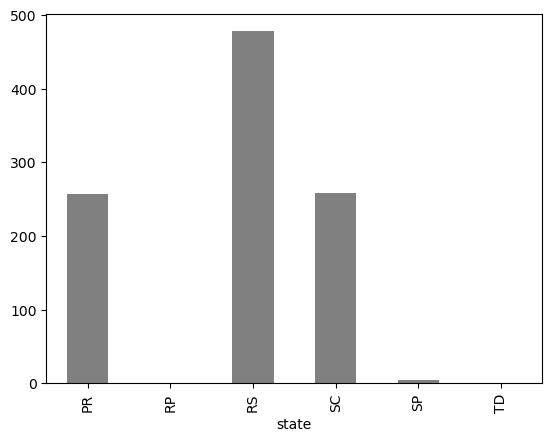

In [7]:
agrouped.plot.bar(color = 'gray')

In [8]:
agrouped = dataset.groupby(['genre']).size()
agrouped

genre
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='genre'>

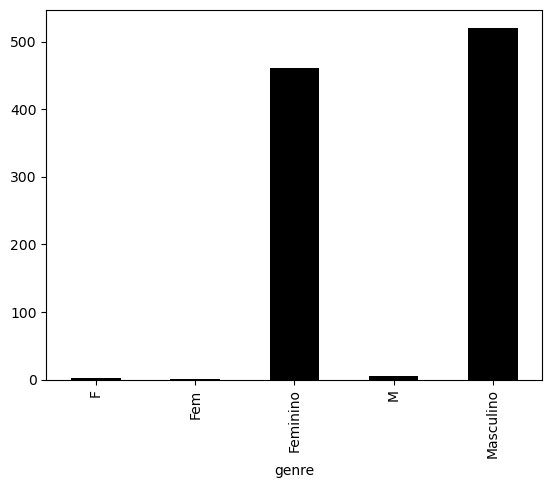

In [9]:
agrouped.plot.bar(color = 'black')

# Exploring numeric columns (below)

In [10]:
dataset['score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'score')

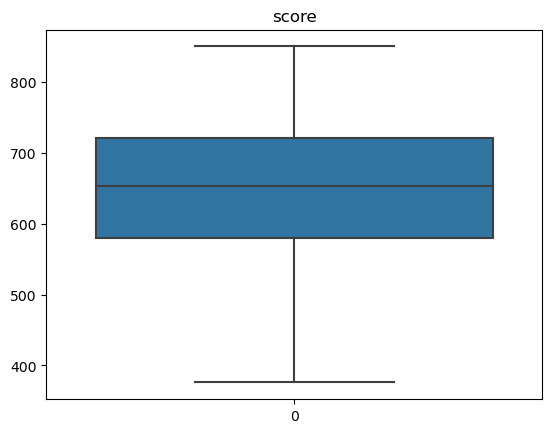

In [11]:
sea.boxplot(dataset['score']).set_title('score')

Text(0.5, 1.0, 'score')

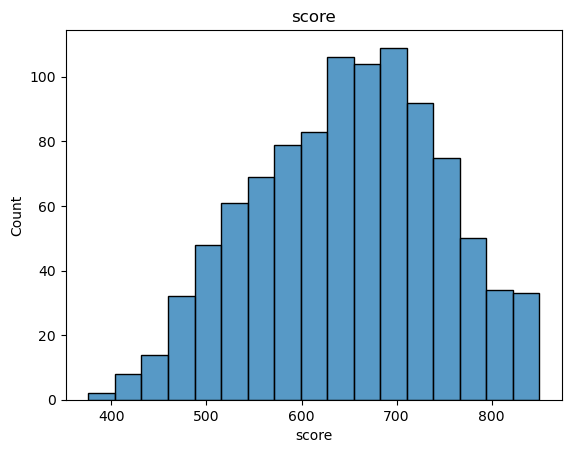

In [12]:
sea.histplot(dataset['score']).set_title('score')

# Age (below)

In [13]:
dataset['age'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'age')

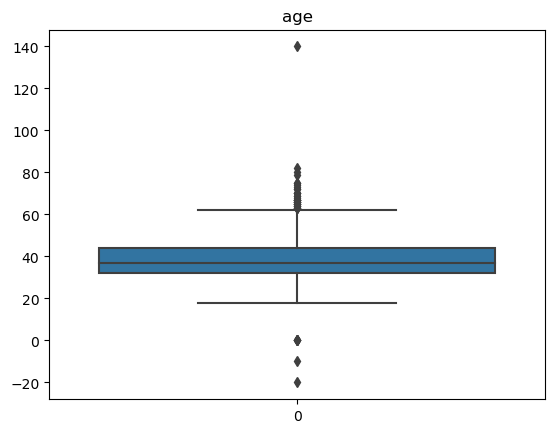

In [14]:
sea.boxplot(dataset['age']).set_title('age')

Text(0.5, 1.0, 'age')

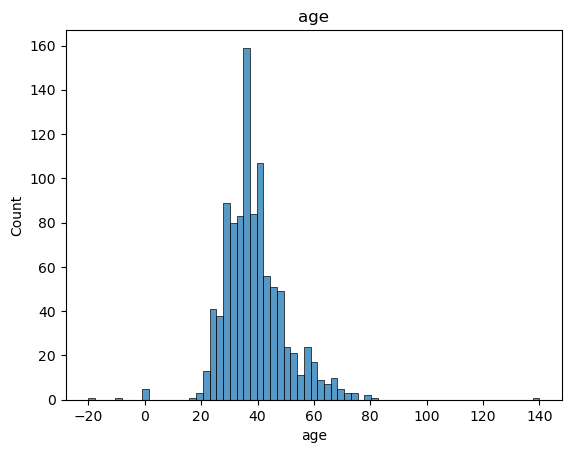

In [15]:
sea.histplot(dataset['age']).set_title('age')

In [16]:
dataset['balance'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: balance, dtype: float64

Text(0.5, 1.0, 'balance')

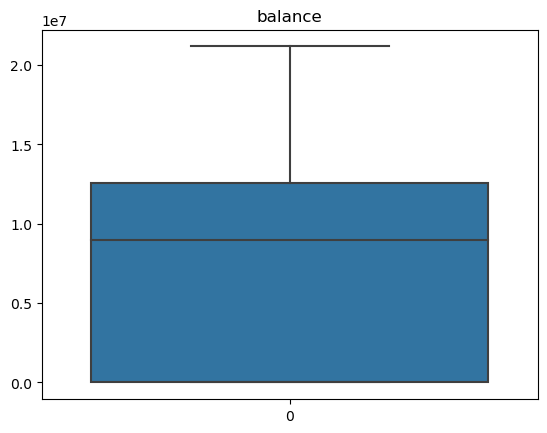

In [17]:
sea.boxplot(dataset['balance']).set_title('balance')

Text(0.5, 1.0, 'balance')

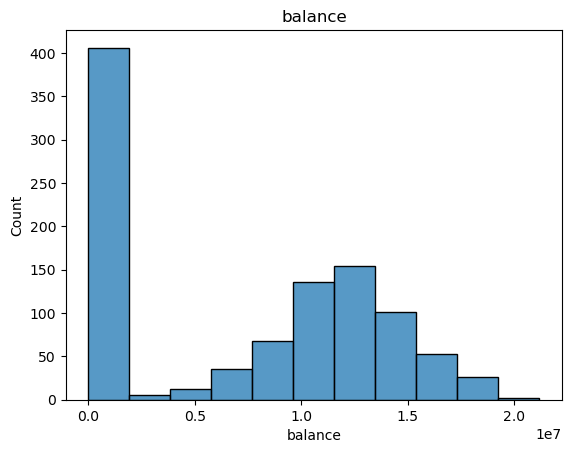

In [18]:
sea.histplot(dataset['balance']).set_title('balance')

In [19]:
dataset['salary'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salary, dtype: float64

Text(0.5, 1.0, 'salary')

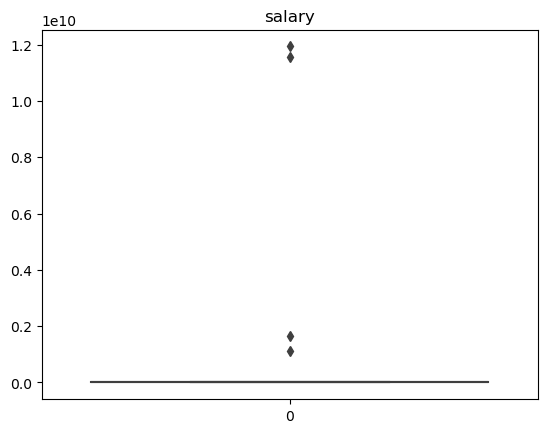

In [20]:
sea.boxplot(dataset['salary']).set_title('salary')

Text(0.5, 1.0, 'salary')

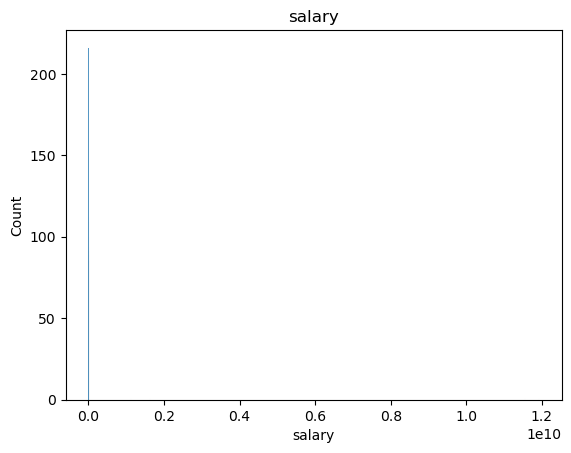

In [21]:
sea.histplot(dataset['salary']).set_title('salary')

# values NaN (below)
# genre and salary (below)

In [22]:
## Here show columns where have NaN
dataset.isnull().sum()

id                0
score             0
state             0
genre             8
age               0
patrimony         0
balance           0
products          0
haveCreditCard    0
active            0
salary            7
out               0
dtype: int64

In [23]:
dataset['salary'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salary, dtype: float64

In [24]:
median = sts.median(dataset['salary'])
median

70518.0

In [25]:
# replace NaN for median
dataset['salary'].fillna(median, inplace=True)

In [26]:
dataset['salary'].isnull().sum()

0

In [27]:
agrouped = dataset.groupby(['genre']).size()
agrouped

genre
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [28]:
#verifica total de NAs
dataset['genre'].isnull().sum()

8

In [29]:
#preenche NaN com Masculino
dataset['genre'].fillna('Masculino', inplace=True)

In [30]:
#Verifica novamente as NAs
dataset['genre'].isnull().sum()

0

In [31]:
#Padroniza de acordo com o genero
dataset.loc[dataset['genre'] == 'M', 'genre'] = 'Masculino'
dataset.loc[dataset['genre'].isin( ['Fem','F']), 'genre'] = 'Feminino'

agrouped = dataset.groupby(['genre']).size()
agrouped

genre
Feminino     464
Masculino    535
dtype: int64

In [32]:
dataset['age'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: age, dtype: float64

In [34]:
dataset.loc[(dataset['age'] < 0 ) | ( dataset['age'] > 120)]

,id,score,state,genre,age,patrimony,balance,products,haveCreditCard,active,salary,out
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0
